# Exercise: Classify Flowers with a Decision Tree

In this exercise, we'll classify three different iris flower types using a decision tree classifier. 

Your tasks are the following:

- Identify the data types of `X` and `y`
- Get an overview of the dataset
- Plot a histogram of the data
- Split into training and test data
- Examine the shape of your training data
- Train a decision tree
- Make predictions with your model
- Calculate the accuracy

## 1. Data Analysis

In [1]:
# import packages
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
# store features and labels in X and y
X = iris.data
y = iris.target

In [4]:
# print description of dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**TODO**: Which data types are X and y, respectively?

In [5]:
# print the type of X and y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


**YOUR ANSWER**:

**TODO**: Get an overview of the dataset and answer the following questions:
- How many features are in the dataset?
- How many samples are in the dataset?
- Which labels do exist?
- Are there empty data entries that we have to take care of?
- Are there categorical or numerical attributes?

In [6]:
# print the first 5 rows of X
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# print the first 5 rows of y (note that the data is not shuffled)
y.head()  

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [8]:
# print info about the dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
# print the target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# print statistics of the dataset
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**YOUR ANSWER**:

**TODO**: Plot a histogram of the data. Can you guess which features might be more important than others?

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

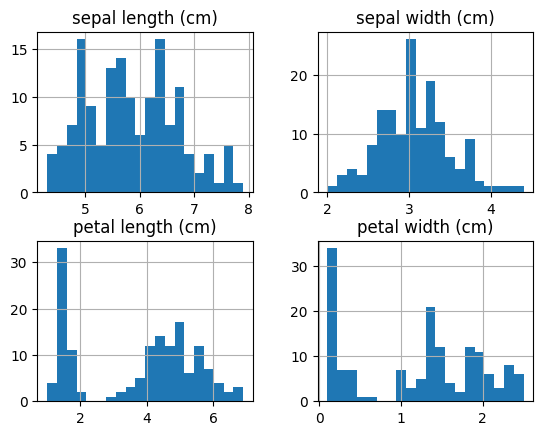

In [11]:
# plot the histogram of the dataset
X.hist(bins=20)

**YOUR ANSWER**:

# 2. Training and Evaluation

In [12]:
# we only use 2 features for training
X = iris.data[["petal length (cm)", "petal width (cm)"]]

**TODO**: Split `X` and `y` in training and test data. Save the result in variables called `X_train`, `X_test`, `y_train`, `y_test`. 

In [13]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

**TODO**: How many samples are contained in `X_test`? Which data format do we have here?

In [14]:
# print the shape and type of X_train and X_test
print(X.values.shape)
print(X_test.shape)
type(X_test)

(150, 2)
(38, 2)


pandas.core.frame.DataFrame

**YOUR ANSWER**:

**TODO**: Fit a `DecisionTreeClassifier` with `max_depth=3` and `random_state` set to a value of your choice on the training data!

In [15]:
# train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=13)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

[Text(0.375, 0.875, 'x[0] <= 2.45\ngini = 0.665\nsamples = 112\nvalue = [38, 40, 34]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[1] <= 1.75\ngini = 0.497\nsamples = 74\nvalue = [0, 40, 34]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[0] <= 5.35\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(0.125, 0.125, 'gini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'x[0] <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

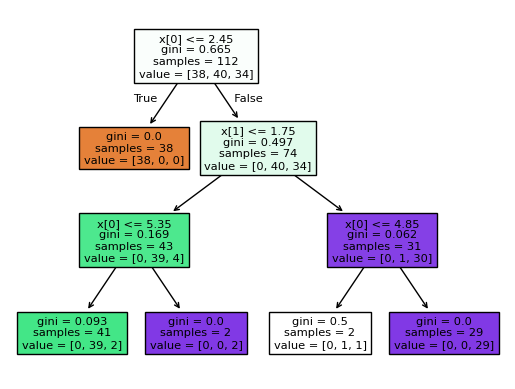

In [16]:
# plot the decision tree
from sklearn.tree import plot_tree
plot_tree(model, filled=True)

**TODO**: Calculate the predictions on training and test data and save the result in `y_pred_train` and `y_pred_test`, respectively.

In [17]:
# make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

**TODO**: Evaluate your model by calculating the accuracy on training and test data, i.e. the number of correctly classified samples normalized over all samples:

$
\text{Accuracy} = \frac{\text{\# correctly classified samples}}{\text{\# samples}}
$

In [18]:
# calculate accuracy on training and test set
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_pred_train, y_train)
acc_test = accuracy_score(y_pred_test, y_test)
print(acc_train)
print(acc_test)

0.9732142857142857
0.9473684210526315


tree thresholds: [ 2.44999999 -2.         -2.        ]
tree thresholds: [ 2.44999999 -2.          1.75       -2.         -2.        ]
tree thresholds: [ 2.44999999 -2.          1.75        5.3499999  -2.         -2.
  4.85000014 -2.         -2.        ]


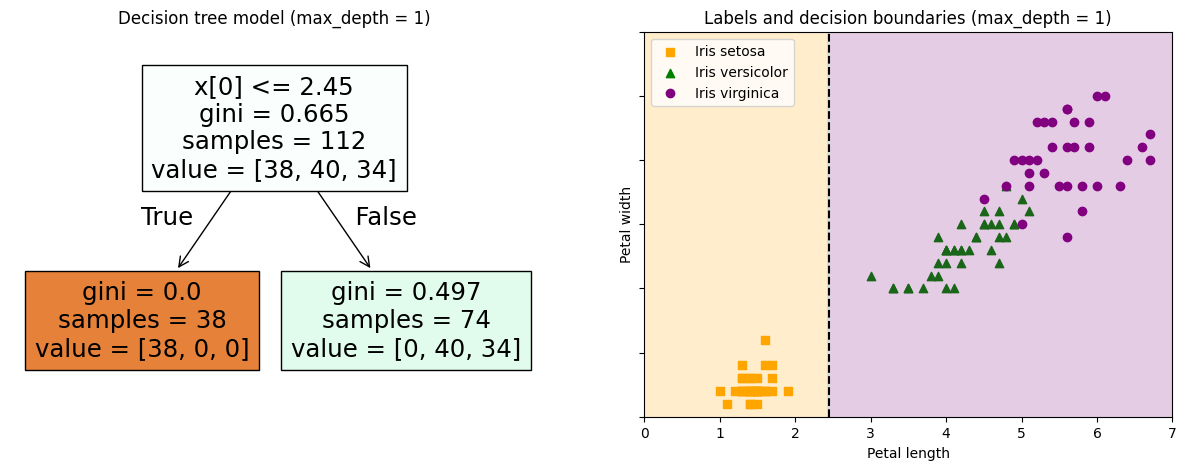

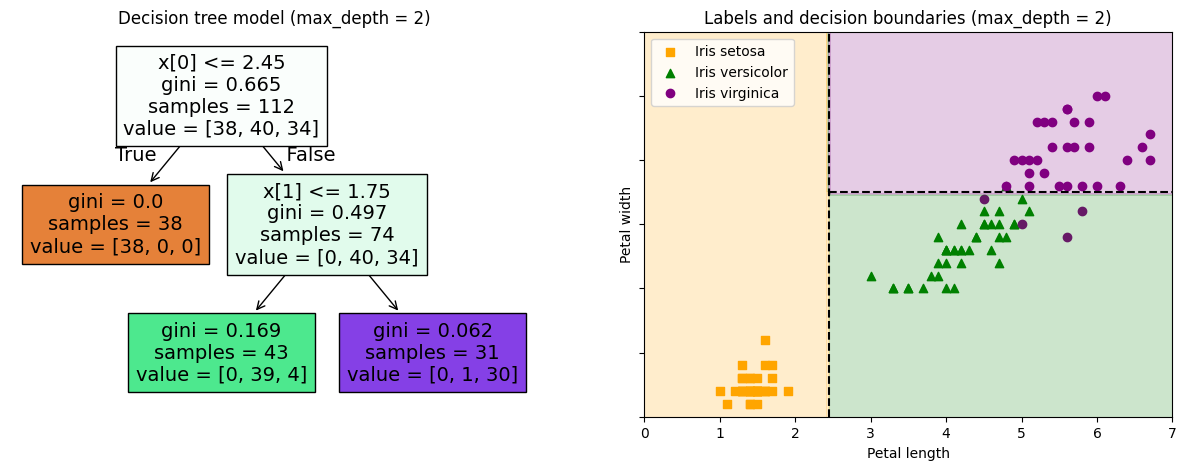

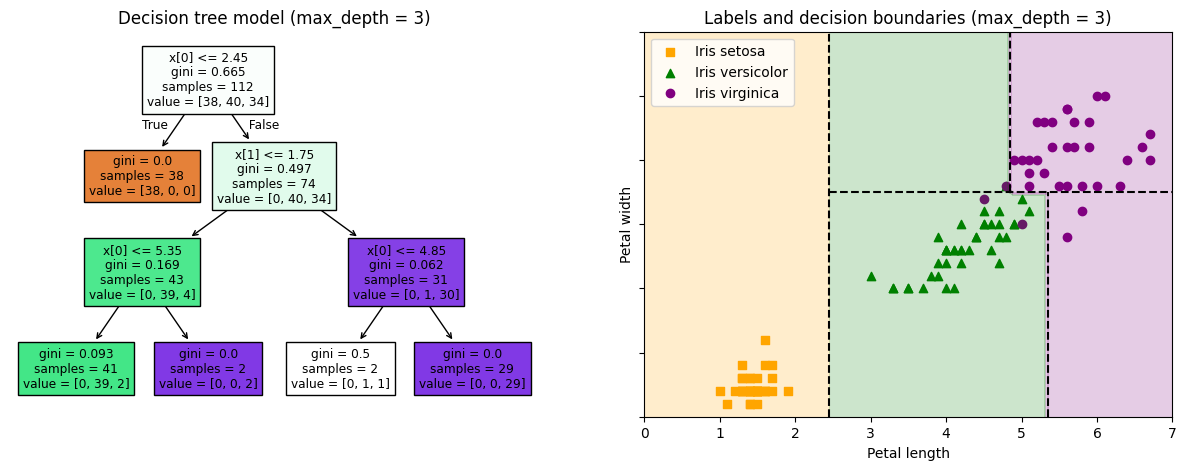

In [20]:
# plot several decision trees with different max_depth

def plot_decision_boundaries(X_train, y_train, max_depth):
    # train another decision tree classifier with variable max_depth for plotting
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=13)
    model.fit(X_train.values, y_train.values)

    # use subplots to plot the decision tree and the decision boundaries
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

    # plot the decision tree
    plot_tree(model, filled=True, ax=ax1)
    ax1.set_title("Decision tree model (max_depth = {})".format(max_depth))

    # plot params
    xlim0, xlim1 = 0, 7
    ylim0, ylim1 = 0, 3

    # plot labels
    ax2.scatter(X_train.values[y_train.values == 0, 0], X_train.values[y_train.values == 0, 1], color='orange', marker='s', label="Iris setosa")
    ax2.scatter(X_train.values[y_train.values == 1, 0], X_train.values[y_train.values == 1, 1], color='green', marker='^', label="Iris versicolor")
    ax2.scatter(X_train.values[y_train.values == 2, 0], X_train.values[y_train.values == 2, 1], color='purple', marker='o', label="Iris virginica")
    ax2.set_xlabel("Petal length")
    ax2.set_ylabel("Petal width")
    ax2.legend(loc="upper left")
    ax2.set_title("Labels and decision boundaries (max_depth = {})".format(max_depth))

    # plot the predictions
    from matplotlib.colors import ListedColormap
    my_cmap = ListedColormap(['orange', 'green', 'purple'])
    xx, yy = np.meshgrid(np.linspace(xlim0, xlim1, 100), np.linspace(ylim0, ylim1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=0.2, cmap=my_cmap)

    # plot the decision boundaries
    print("tree thresholds:", model.tree_.threshold)
    if max_depth == 1:
        a = model.tree_.threshold[[0]]
        ax2.plot([a, a], [ylim0, ylim1], "k--")
    elif max_depth == 2:
        a, b = model.tree_.threshold[[0, 2]]
        ax2.plot([a, a], [ylim0, ylim1], "k--")
        ax2.plot([a, xlim1], [b, b], "k--")
    elif max_depth == 3:
        a, b, c, d = model.tree_.threshold[[0, 2, 3, 6]]
        ax2.plot([a, a], [ylim0, ylim1], "k--")
        ax2.plot([a, xlim1], [b, b], "k--")
        ax2.plot([c, c], [ylim0, b], "k--")
        ax2.plot([d, d], [b, ylim1], "k--")


for i in range(1, 4):
    plot_decision_boundaries(X_train, y_train, i)